# Week 2 tasks #

## Task 1: ##
In objective 1 you are asked to construct a HI, which represents a health
status. What part of the training data can be considered “healthy” and what
part of the training data can be considered “degraded”? How can you en-
code the two statuses?

## Answer: ##
A unit is healthy as long as the sensor measurements are static / within the normal range. As soon as they diverge from the normal range, the unit is considered degraded. The two statuses can be encoded as 0 (healthy) and 1 (degraded).

## Task 2: ##
In objective 2, you are asked to calculate RUL either directly or based on
the HI you constructed. What are the advantages and disadvantages of the
two approaches? When receiving test data, how does the process look like
from receiving the raw test data up to the calculated RUL value? Do you
use regression, classification or both in this process in order to predict RUL?

## Answer: ##
The advantage of calculating RUL directly is that it is a simple and straightforward approach. The disadvantage is that it is not very accurate. The advantage of calculating RUL based on the HI is that it is more accurate. The disadvantage is that it is more complex. When receiving test data, the process looks like this: 1. Preprocess the data (e.g. remove outliers, normalize the data, etc.) 2. Calculate the HI 3. Calculate the RUL based on the HI. We use regression to predict RUL.

As I see it, the HI would work as an additional input feature to the regression model. The model would then predict the RUL based on the HI and the other input features. The HI would indicate if the observed measurements are within the normal range or not. 

# Implementation #

In [1]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
## import FD001 & remove empty columns

df_train_FD001 = pd.read_csv("../CMAPSSdata/train_FD001.txt", sep=" ", header = None)
df_train_FD001=df_train_FD001.drop([26,27], axis=1)
df_train_FD001.name = "train_FD001"
# define header
header_txt = ["unit_number","time_cycle", "setting_1", "setting_2", "setting_3",
              "sensor_1", "sensor_2", "sensor_3","sensor_4","sensor_5","sensor_6", "sensor_7", "sensor_8", "sensor_9", 
              "sensor_10", "sensor_11", "sensor_12", "sensor_13", "sensor_14", "sensor_15", "sensor_16", "sensor_17", 
              "sensor_18", "sensor_19", "sensor_20", "sensor_21"] 
df_train_FD001.columns = header_txt # add header to datafile

df_train_FD001.head()

,unit_number,time_cycle,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [10]:
remaining_names = ['sensor_3', 'sensor_4', 'sensor_7', 'sensor_11', 'sensor_12']
sensor_names = ['sensor_{}'.format(i+1) for i in range(0,21)]
# remove unused sensors
drop_sensors = [element for element in sensor_names if element not in remaining_names]
X_train_pre = df_train_FD001.drop(drop_sensors, axis=1)
X_train_pre.head()


,unit_number,time_cycle,setting_1,setting_2,setting_3,sensor_3,sensor_4,sensor_7,sensor_11,sensor_12
0,1,1,-0.0007,-0.0004,100.0,1589.70,1400.60,554.36,47.47,521.66
1,1,2,0.0019,-0.0003,100.0,1591.82,1403.14,553.75,47.49,522.28
2,1,3,-0.0043,0.0003,100.0,1587.99,1404.20,554.26,47.27,522.42
3,1,4,0.0007,0.0000,100.0,1582.79,1401.87,554.45,47.13,522.86
4,1,5,-0.0019,-0.0002,100.0,1582.85,1406.22,554.00,47.28,522.19


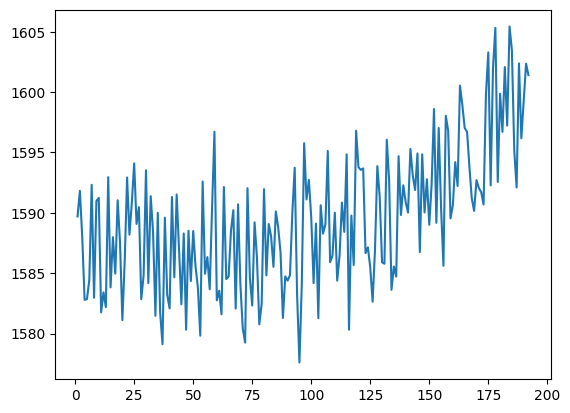

In [20]:
X_1 = X_train_pre[X_train_pre['unit_number']==1]
plt.plot(X_1['time_cycle'], X_1['sensor_3'])#, 'Sensor 3', 'Time Cycle', 'Sensor Value', 'Sensor 3 over Time for Unit 1')

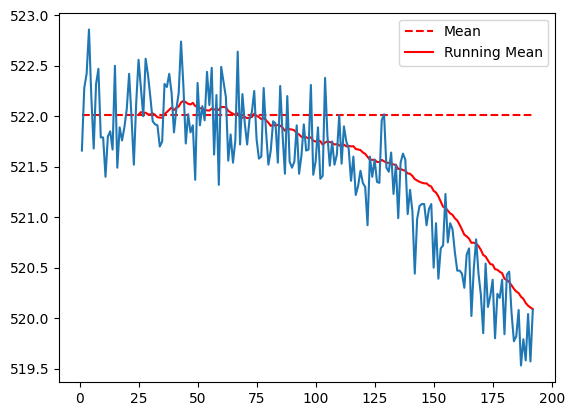

In [33]:
for s in remaining_names:
    X_m = X_1[X_1['time_cycle'] <= 25]
    mean = X_m[s].mean()
    running_mean = X_1[s].rolling(window=25).mean()

plt.plot(X_1['time_cycle'], [mean]*len(X_1['time_cycle']), 'r--', label='Mean')
plt.plot(X_1['time_cycle'], running_mean, 'r-', label='Running Mean')
plt.plot(X_1['time_cycle'], X_1[s])
plt.legend()

53
87
132
48
135


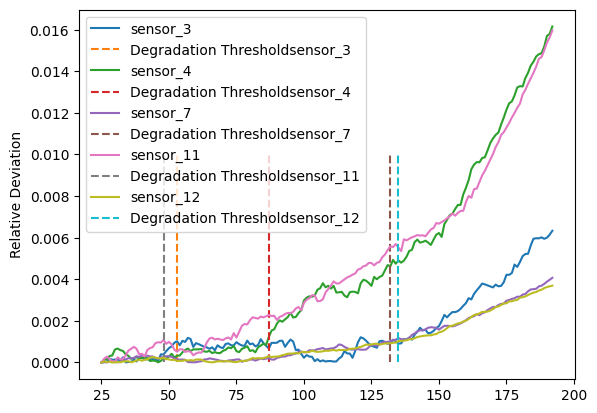

In [56]:
for s in remaining_names:
    X_m = X_1[X_1['time_cycle'] <= 25]
    mean = X_m[s].mean()
    running_mean = X_1[s].rolling(window=25).mean()
    # Filter healthy states
    plt.plot(X_1['time_cycle'], abs(running_mean-mean)/mean, label=s)
    plt.ylabel('Relative Deviation')
    timepoint_degraded = (abs(running_mean-mean)/mean > 0.001)
    timepoint_degraded = min(X_1[timepoint_degraded]['time_cycle'])
    print(timepoint_degraded)
    plt.plot([timepoint_degraded]*2, [0, 0.01], '--', label='Degradation Threshold'+s)
    plt.legend()


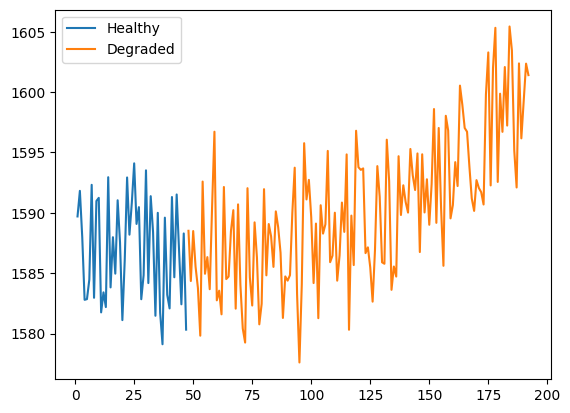

In [59]:
timepoints = []
for s in remaining_names:
    X_m = X_1[X_1['time_cycle'] <= 25]
    mean = X_m[s].mean()
    running_mean = X_1[s].rolling(window=25).mean()
    # Filter healthy states
    timepoint_degraded = (abs(running_mean-mean)/mean > 0.001)
    timepoint_degraded = min(X_1[timepoint_degraded]['time_cycle'])
    # save timepoints
    timepoints.append(timepoint_degraded)

X_degraded = X_1[X_1['time_cycle'] >= min(timepoints)]
X_healthy = X_1[X_1['time_cycle'] < min(timepoints)]
plt.plot(X_healthy['time_cycle'], X_healthy['sensor_3'], label='Healthy')
plt.plot(X_degraded['time_cycle'], X_degraded['sensor_3'], label='Degraded')
plt.legend()
